In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


plt.style.use("seaborn-v0_8-white")

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Credit_Risk_Dataset_Onyx_Data_September_25.xlsx')
df.head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,...,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
0,CUST_00001,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,...,43.6532,-79.3832,Self-employed,36,0.593220,8402.453850,0.735635,14,0.495557,0
1,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,...,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3
2,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,...,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0
3,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,...,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0
4,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,...,42.8864,-78.8784,Part-time,36,0.643382,15626.153439,0.930628,4,0.228103,0


In [3]:
df.rename(columns = {'person_age':'age', 'person_income':'income', 'person_home_ownership':'home_ownership',
       'person_emp_length':'emp_length','loan_amnt':'loan_amount','cb_person_default_on_file':'default_history',
        'cb_person_cred_hist_length':'credit_history_length','loan_int_rate':'interest_rate' }, inplace= True)
df.columns

Index(['client_ID', 'age', 'income', 'home_ownership', 'emp_length',
       'loan_intent', 'loan_grade', 'loan_amount', 'interest_rate',
       'loan_status', 'loan_percent_income', 'default_history',
       'credit_history_length', 'gender', 'marital_status', 'education_level',
       'country', 'state', 'city', 'city_latitude', 'city_longitude',
       'employment_type', 'loan_term_months', 'loan_to_income_ratio',
       'other_debt', 'debt_to_income_ratio', 'open_accounts',
       'credit_utilization_ratio', 'past_delinquencies'],
      dtype='object')

In [4]:
display("Shape of dataset:", df.shape)
display("Data Types: ", df.info())
display("Missing Values: ", df.isnull().sum())
display("Summary Statistics: ", df.describe(include='all'))

'Shape of dataset:'

(32581, 29)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   client_ID                 32581 non-null  object 
 1   age                       32581 non-null  int64  
 2   income                    32581 non-null  int64  
 3   home_ownership            32581 non-null  object 
 4   emp_length                31686 non-null  float64
 5   loan_intent               32581 non-null  object 
 6   loan_grade                32581 non-null  object 
 7   loan_amount               32581 non-null  int64  
 8   interest_rate             29465 non-null  float64
 9   loan_status               32581 non-null  int64  
 10  loan_percent_income       32581 non-null  float64
 11  default_history           32581 non-null  object 
 12  credit_history_length     32581 non-null  int64  
 13  gender                    32581 non-null  object 
 14  marita

'Data Types: '

None

'Missing Values: '

client_ID                      0
age                            0
income                         0
home_ownership                 0
emp_length                   895
loan_intent                    0
loan_grade                     0
loan_amount                    0
interest_rate               3116
loan_status                    0
loan_percent_income            0
default_history                0
credit_history_length          0
gender                         0
marital_status                 0
education_level                0
country                        0
state                          0
city                           0
city_latitude                  0
city_longitude                 0
employment_type                0
loan_term_months               0
loan_to_income_ratio           0
other_debt                     0
debt_to_income_ratio           0
open_accounts                  0
credit_utilization_ratio       0
past_delinquencies             0
dtype: int64

'Summary Statistics: '

,client_ID,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amount,interest_rate,loan_status,...,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
count,32581,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,...,32581.000000,32581.000000,32581,32581.000000,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000
unique,32581,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,...,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CUST_00001,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,...,NaN,NaN,Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,...,NaN,NaN,19473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,...,45.407613,-63.805473,NaN,38.501581,0.170553,1.156796e+04,0.345208,8.042018,0.499884,0.505141
std,NaN,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,...,7.644809,46.615580,NaN,16.012441,0.107049,1.306093e+04,0.129406,4.328087,0.259530,0.711745
min,NaN,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,...,29.760400,-123.365600,NaN,12.000000,0.000789,2.252074e+02,0.064502,0.000000,0.050001,0.000000
25%,NaN,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,...,40.712800,-96.797000,NaN,24.000000,0.089655,5.387168e+03,0.251236,4.000000,0.275358,0.000000
50%,NaN,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,...,46.813900,-75.697200,NaN,36.000000,0.148148,8.995071e+03,0.333188,8.000000,0.500289,0.000000
75%,NaN,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,...,51.507400,-3.943600,NaN,60.000000,0.229167,1.456293e+04,0.423142,12.000000,0.725056,1.000000


In [5]:
df['emp_length'].fillna(df['emp_length'].mean(), inplace=True)
df['interest_rate'] = df.groupby('loan_grade')['interest_rate']\
                        .transform(lambda x: x.fillna(x.median()))
df.isnull().sum()

client_ID                   0
age                         0
income                      0
home_ownership              0
emp_length                  0
loan_intent                 0
loan_grade                  0
loan_amount                 0
interest_rate               0
loan_status                 0
loan_percent_income         0
default_history             0
credit_history_length       0
gender                      0
marital_status              0
education_level             0
country                     0
state                       0
city                        0
city_latitude               0
city_longitude              0
employment_type             0
loan_term_months            0
loan_to_income_ratio        0
other_debt                  0
debt_to_income_ratio        0
open_accounts               0
credit_utilization_ratio    0
past_delinquencies          0
dtype: int64

### Default Rate

In [73]:
default_rate = df["loan_status"].mean()
print(f"Overall Default Rate: {default_rate:.2%}")

Overall Default Rate: 21.82%


#### Exploratory Data Analysis

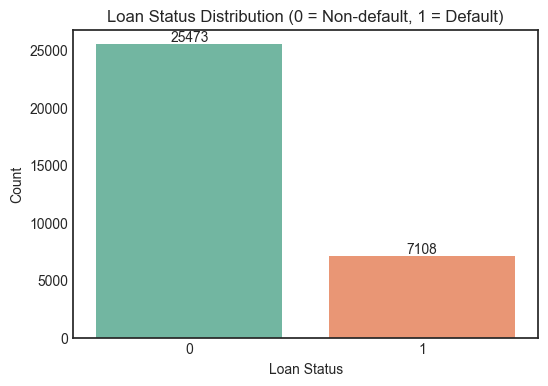

In [6]:
# Target Variable Distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(x="loan_status", data=df, palette="Set2")
for container in ax.containers:
    ax.bar_label(container) 
plt.title("Loan Status Distribution (0 = Non-default, 1 = Default)")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

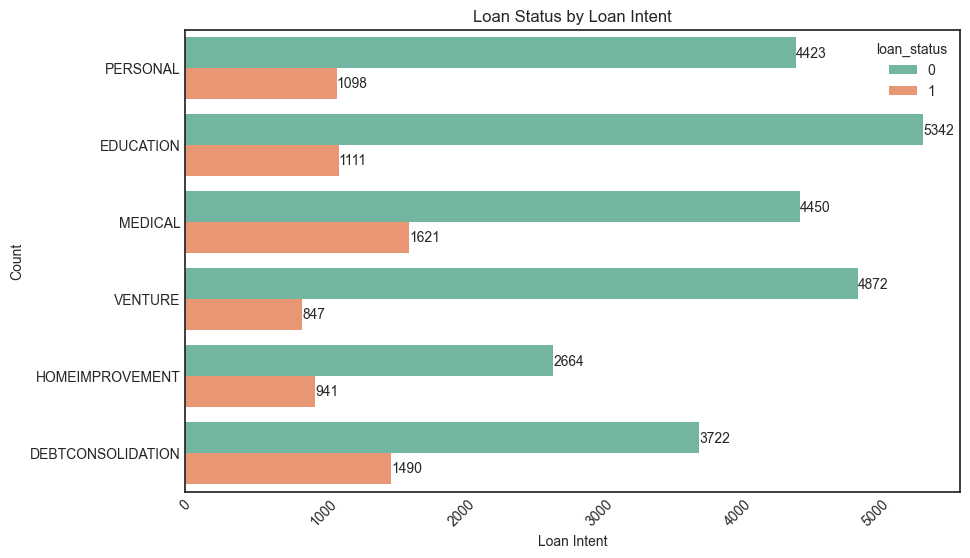

In [8]:
#  Loan Status by Loan Intent
plt.figure(figsize=(10,6))
ax = sns.countplot(y="loan_intent", hue="loan_status", data=df, palette="Set2")
for container in ax.containers:
    ax.bar_label(container) 
plt.title("Loan Status by Loan Intent")
plt.xlabel("Loan Intent")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

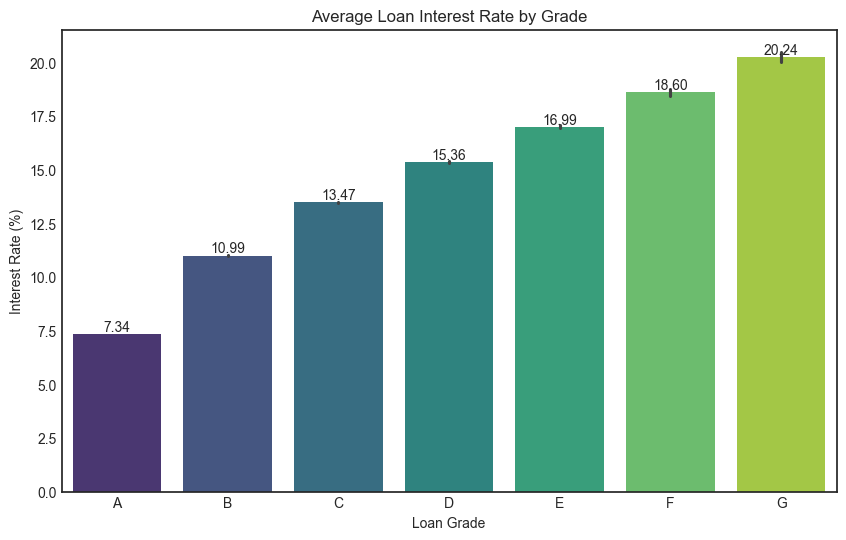

In [9]:
#  Average Interest Rate by Loan Grade
plt.figure(figsize=(10,6))
ax = sns.barplot(x="loan_grade", y="interest_rate", data=df, palette="viridis",
                order=["A",'B','C','D','E','F','G'])
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 
plt.title("Average Loan Interest Rate by Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Interest Rate (%)")
plt.show()


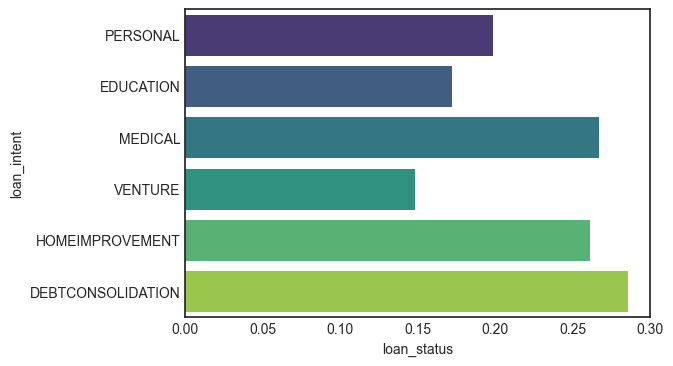

In [10]:
plt.figure(figsize=(6,4))
ax = sns.barplot(y='loan_intent', x= 'loan_status',  data = df, errorbar= None, palette= 'viridis')

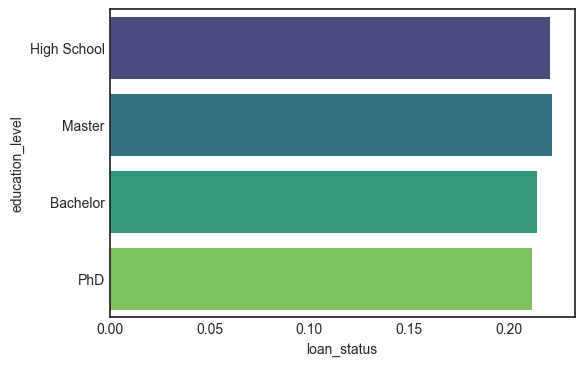

In [11]:
plt.figure(figsize=(6,4))
ax = sns.barplot(y='education_level', x= 'loan_status',  data = df, errorbar= None, palette= 'viridis')

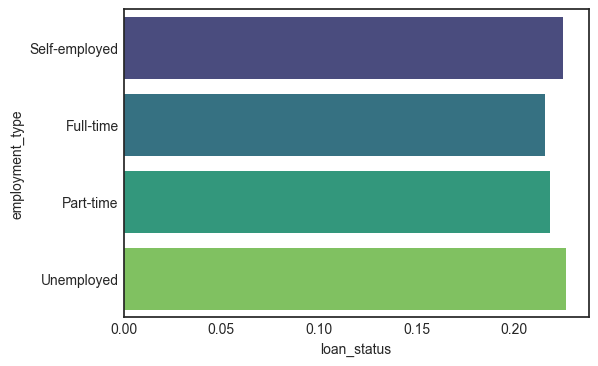

In [12]:
plt.figure(figsize=(6,4))
ax = sns.barplot(y='employment_type', x= 'loan_status', data = df, errorbar= None, palette= 'viridis')

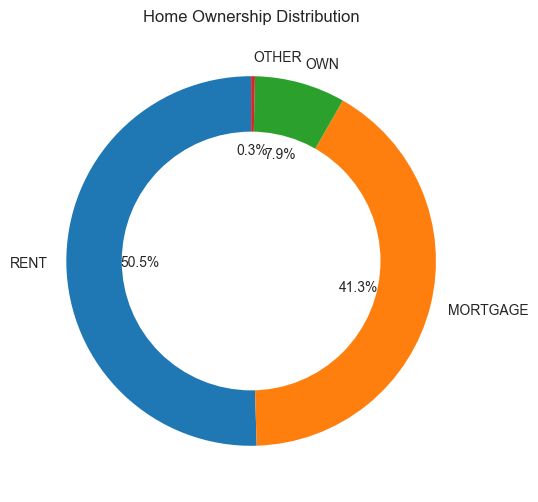

In [13]:
# Donut Chart: Home Ownership Distribution
home_ownership_counts = df["home_ownership"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(home_ownership_counts, labels=home_ownership_counts.index, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Home Ownership Distribution")
plt.show()

In [14]:
default_matrix = pd.pivot_table(
    df,
    values='loan_status',
    index='employment_type',
    columns='home_ownership',
    aggfunc='mean'
)

# Display the matrix
default_matrix.style.format("{:.2%}").background_gradient(cmap="Reds", axis= None)

home_ownership,MORTGAGE,OTHER,OWN,RENT
employment_type,,,,
Full-time,12.19%,28.57%,7.79%,31.41%
Part-time,12.30%,41.67%,7.06%,31.98%
Self-employed,13.79%,25.00%,6.72%,31.54%
Unemployed,14.61%,25.00%,7.52%,31.96%


In [15]:
default_matrix = pd.pivot_table(
    df,
    values='loan_status',
    index='education_level',
    columns='marital_status',
    aggfunc='mean'
)

# Display the matrix
default_matrix.style.format("{:.2%}").background_gradient(cmap="Reds", axis= None)

marital_status,Divorced,Married,Single,Widowed
education_level,,,,
Bachelor,21.04%,21.29%,21.81%,19.17%
High School,22.04%,21.60%,22.49%,21.01%
Master,24.13%,24.33%,20.04%,24.72%
PhD,14.73%,20.08%,22.46%,25.97%


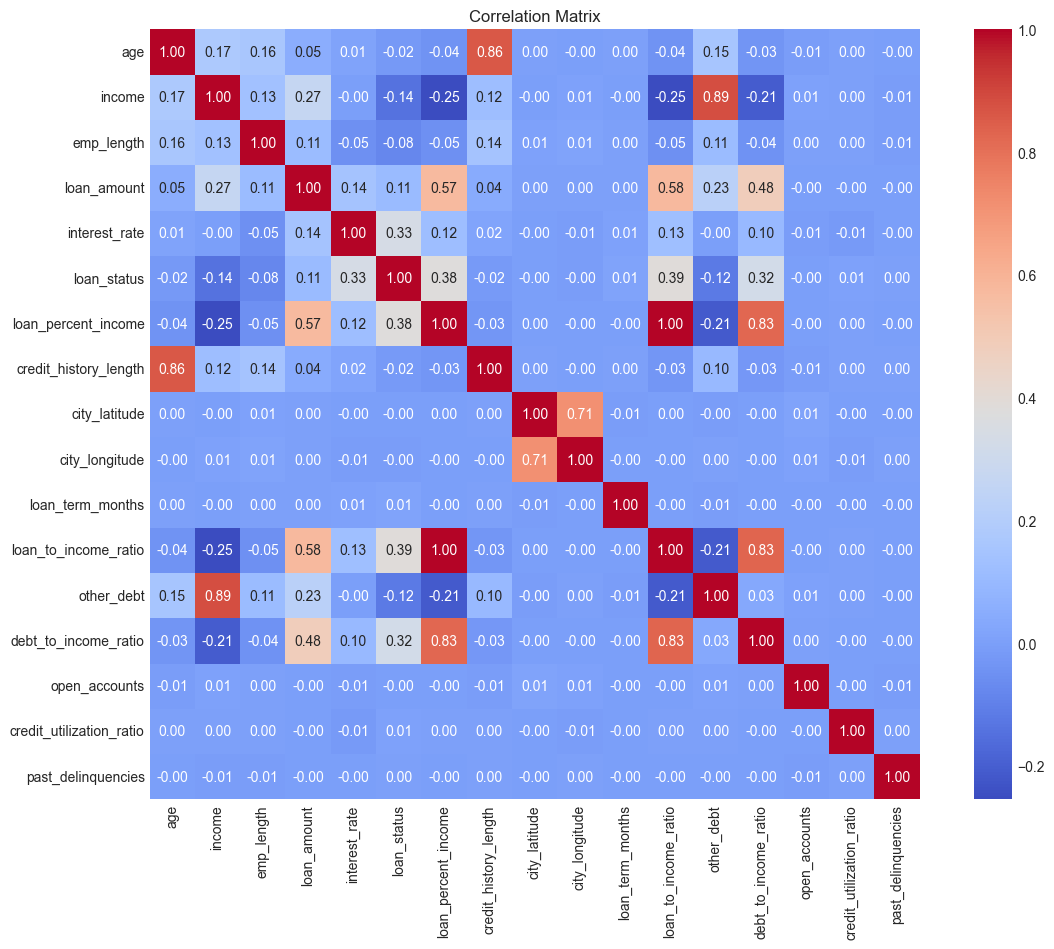

In [16]:
# Correlation Matrix Heatmap 
numeric_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(14,10))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

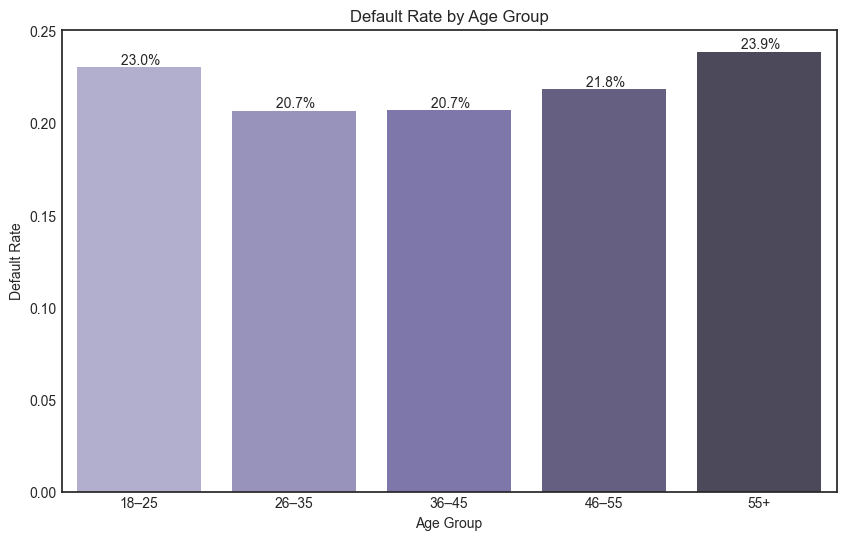

In [17]:
# Age vs Default Rate 
age_bins = [17, 25, 35, 45, 55,100]  # adjust based on your data range
age_labels = ['18–25', '26–35', '36–45', '46–55',  '55+']

# Create new binned column
df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True)

plt.figure(figsize=(10,6))
ax = sns.barplot(x='age_bin', y='loan_status', data=df, errorbar = None, palette='Purples_d')
for container in ax.containers:
    ax.bar_label(container, labels = [f"{h.get_height() * 100 : .1f}%" for h in container])
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.show()

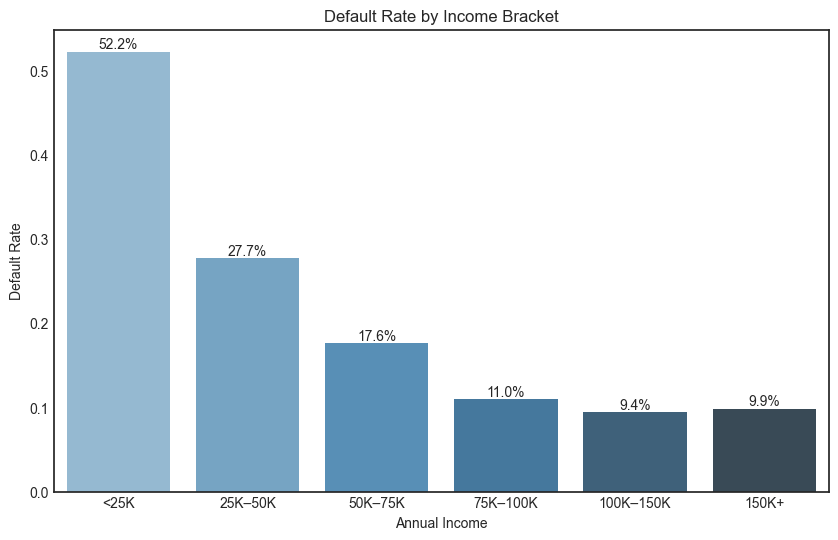

In [18]:
# Loan Amount vs Income (Colored by Default)
income_bins = [0, 25000, 50000, 75000, 100000, 150000, np.inf]
income_labels = ['<25K', '25K–50K', '50K–75K', '75K–100K', '100K–150K', '150K+']
df['income_bin'] = pd.cut(df['income'], bins=income_bins, labels=income_labels)

plt.figure(figsize=(10,6))
ax = sns.barplot(x='income_bin', y='loan_status', data=df, palette='Blues_d',errorbar= None)
for container in ax.containers:
    ax.bar_label(container, labels=[f"{h.get_height() * 100:.1f}%" for h in container])
plt.title('Default Rate by Income Bracket')
plt.xlabel('Annual Income')
plt.ylabel('Default Rate')
plt.show()

In [19]:
default_matrix = pd.pivot_table(
    df,
    values='loan_status',
    index='age_bin',
    columns='income_bin',
    aggfunc='mean'
)


default_matrix.style.format("{:.2%}").background_gradient(cmap="Reds", axis= None)

income_bin,<25K,25K–50K,50K–75K,75K–100K,100K–150K,150K+
age_bin,,,,,,
18–25,53.28%,28.24%,17.40%,11.34%,6.71%,6.46%
26–35,51.57%,27.50%,17.37%,10.23%,10.40%,11.66%
36–45,46.38%,24.54%,19.46%,12.28%,12.96%,8.99%
46–55,62.86%,28.37%,18.63%,11.11%,12.50%,10.00%
55+,45.45%,31.71%,14.71%,26.09%,21.43%,0.00%


In [20]:
loan_bins = [0, 5000, 10000, 15000, 20000, 30000, np.inf]
loan_labels = ['<5K', '5K–10K', '10K–15K', '15K–20K', '20K–30K', '30K+']


df['loan_amount_bin'] = pd.cut(df['loan_amount'], bins=loan_bins, labels=loan_labels)

loan_term_matrix = pd.pivot_table(
    df,
    values='loan_status',
    index='loan_term_months',
    columns='loan_amount_bin',
    aggfunc='mean'
)
loan_term_matrix.style\
    .format("{:.2%}")\
    .background_gradient(cmap="OrRd", axis=None)\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

loan_amount_bin,<5K,5K–10K,10K–15K,15K–20K,20K–30K,30K+
loan_term_months,,,,,,
12,19.51%,16.51%,20.43%,25.36%,32.47%,50.00%
24,21.64%,18.01%,22.54%,30.64%,33.92%,36.11%
36,20.53%,17.36%,23.36%,31.61%,34.54%,33.33%
60,19.89%,19.30%,23.70%,30.55%,36.74%,30.43%


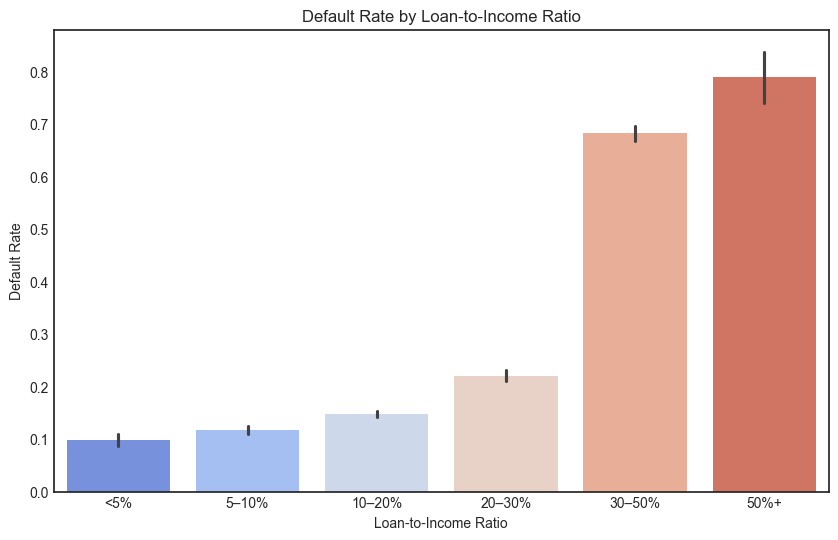

In [21]:
lti_bins = [0, 0.05, 0.1, 0.2, 0.3, 0.5, np.inf]
lti_labels = ['<5%', '5–10%', '10–20%', '20–30%', '30–50%', '50%+']
df['lti_bin'] = pd.cut(df['loan_to_income_ratio'], bins=lti_bins, labels=lti_labels)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='lti_bin', y='loan_status', data=df, palette='coolwarm')
plt.title('Default Rate by Loan-to-Income Ratio')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Default Rate')
plt.show()

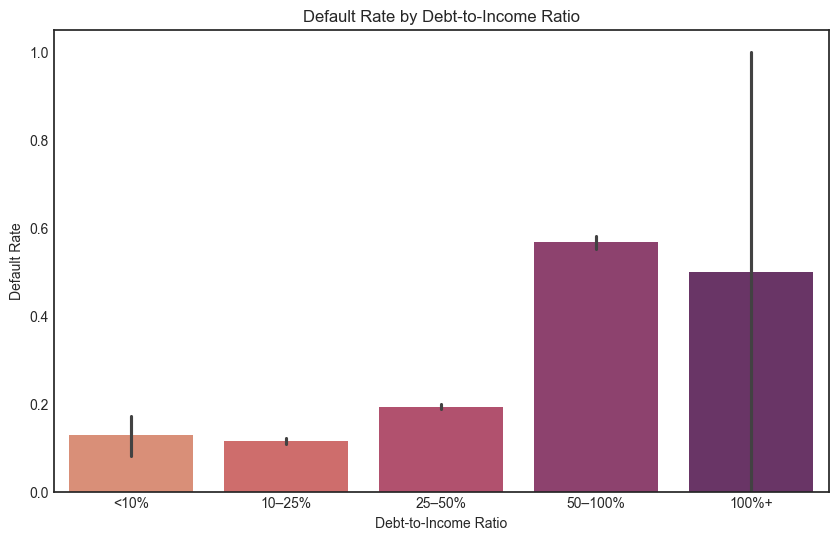

In [22]:
dti_bins = [0, 0.1, 0.25, 0.5, 1.0, np.inf]
dti_labels = ['<10%', '10–25%', '25–50%', '50–100%',  '100%+']
df['dti_bin'] = pd.cut(df['debt_to_income_ratio'], bins=dti_bins, labels=dti_labels)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='dti_bin', y='loan_status', data=df, palette='flare')
plt.title('Default Rate by Debt-to-Income Ratio')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Default Rate')
plt.show()


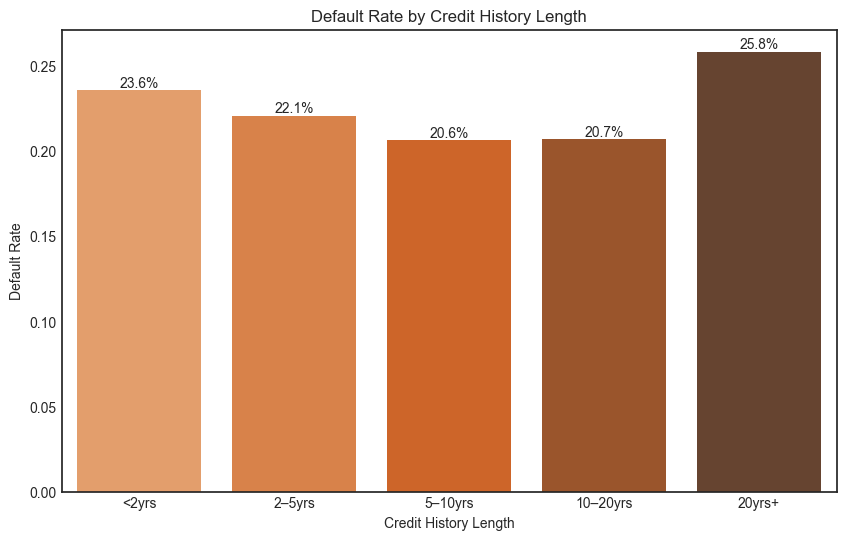

In [23]:
cred_bins = [0, 2, 5, 10, 20, np.inf]
cred_labels = ['<2yrs', '2–5yrs', '5–10yrs', '10–20yrs', '20yrs+']
df['cred_hist_bin'] = pd.cut(df['credit_history_length'], bins=cred_bins, labels=cred_labels)

# plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x='cred_hist_bin', y='loan_status', data=df,errorbar= None, palette='Oranges_d')
for container in ax.containers:
    ax.bar_label(container, labels = [f"{h.get_height()*100:.1f}%" for h in container ])
plt.title('Default Rate by Credit History Length')
plt.xlabel('Credit History Length')
plt.ylabel('Default Rate')
plt.show()

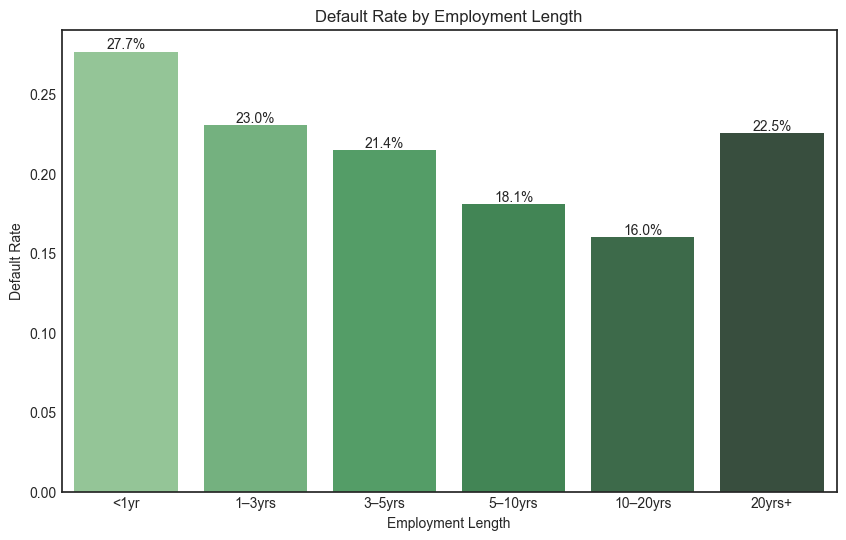

In [24]:
#  Employment Length vs Default Rate
emp_bins = [0, 1, 3, 5, 10, 20, np.inf]
emp_labels = ['<1yr', '1–3yrs', '3–5yrs', '5–10yrs', '10–20yrs', '20yrs+']
df['emp_length_bin'] = pd.cut(df['emp_length'], bins=emp_bins, labels=emp_labels)

plt.figure(figsize=(10,6))
ax = sns.barplot(x='emp_length_bin', y='loan_status', data=df, palette='Greens_d',errorbar= None)
for container in ax.containers:
    ax.bar_label(container, labels=[f"{h.get_height() * 100:.1f}%" for h in container])
plt.title('Default Rate by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Default Rate')
plt.show()

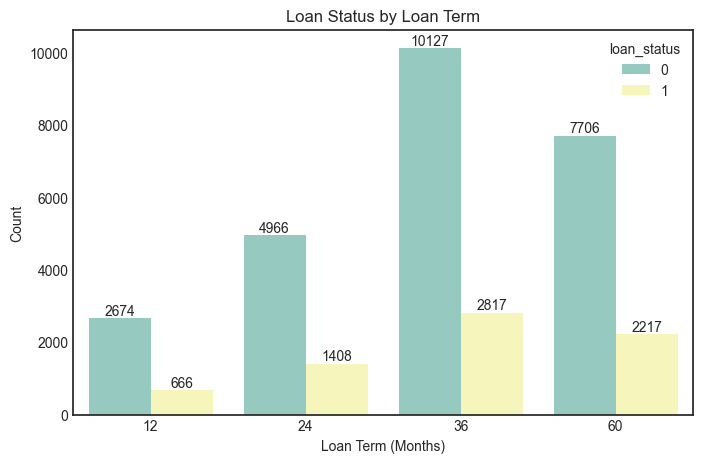

In [25]:
#  Loan Term Analysis
plt.figure(figsize=(8,5))
ax = sns.countplot(x="loan_term_months", hue="loan_status", data=df, palette="Set3")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Loan Status by Loan Term")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Count")
plt.show()


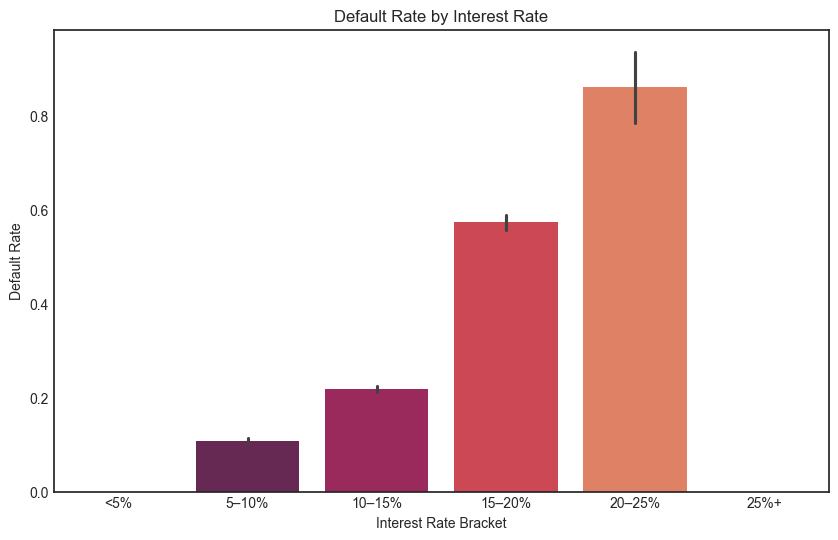

In [28]:
int_rate_bins = [0, 5, 10, 15, 20, 25,  np.inf]
int_rate_labels = ['<5%', '5–10%', '10–15%', '15–20%', '20–25%', '25%+']

# plot
df['int_rate_bin'] = pd.cut(df['interest_rate'], bins=int_rate_bins, labels=int_rate_labels)
plt.figure(figsize=(10,6))
sns.barplot(x='int_rate_bin', y='loan_status', data=df, palette='rocket')
plt.title('Default Rate by Interest Rate')
plt.xlabel('Interest Rate Bracket')
plt.ylabel('Default Rate')
plt.show()


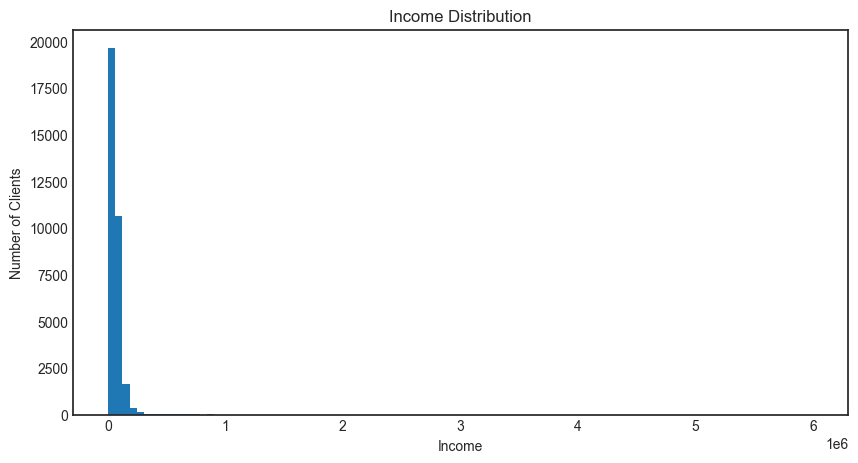

In [26]:
plt.figure(figsize=(10, 5))
plt.hist(df['income'], bins=100)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Number of Clients")
plt.show()


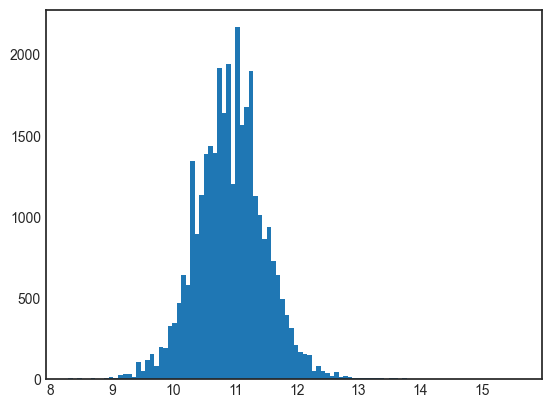

In [29]:
df['log_income'] = np.log1p(df['income'])
plt.hist(df['log_income'], bins=100)
plt.show()

In [32]:
df.drop(columns=['client_ID','income','loan_percent_income','state', 'city', 'city_latitude', 'city_longitude','other_debt', 'income_bin',
       'emp_length_bin', 'cred_hist_bin', 'age_bin', 'loan_amount_bin',
       'lti_bin', 'dti_bin', 'int_rate_bin'], inplace= True)

In [33]:
df.columns

Index(['age', 'home_ownership', 'emp_length', 'loan_intent', 'loan_grade',
       'loan_amount', 'interest_rate', 'loan_status', 'default_history',
       'credit_history_length', 'gender', 'marital_status', 'education_level',
       'country', 'employment_type', 'loan_term_months',
       'loan_to_income_ratio', 'debt_to_income_ratio', 'open_accounts',
       'credit_utilization_ratio', 'past_delinquencies', 'log_income'],
      dtype='object')

In [34]:
df.shape

(32581, 22)

In [36]:
X = df.drop(columns=['loan_status']) 
y = df['loan_status']             

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
numeric_features = [
    'age', 'log_income', 'emp_length', 'loan_amount',
    'interest_rate', 'credit_history_length',
    'loan_to_income_ratio', 'debt_to_income_ratio',
    'open_accounts', 'credit_utilization_ratio',
    'past_delinquencies'
]


categorical_features = [
    'home_ownership', 'loan_intent', 'loan_grade',
    'default_history', 'gender', 'marital_status',
    'education_level', 'country', 'employment_type',
    'loan_term_months'  # Even though it's numeric, treat as categorical if it's discrete like 12, 24, 36, 60
]


In [38]:

# Numeric: impute missing with median, then scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical: impute missing with most frequent, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [39]:
# 4. Combine into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 5. Fit and transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [40]:
print(f"X_train processed shape: {X_train_processed.shape}")
print(f"X_test processed shape: {X_test_processed.shape}")


X_train processed shape: (26064, 51)
X_test processed shape: (6517, 51)


In [41]:
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit model
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'log_income',
                                                   'emp_length', 'loan_amount',
                                                   'interest_rate',
                                                   'credit_history_length',
                                                   'loan_to_income_ratio',
                                                   'debt_to_income_ratio',
                                                   'open_accounts',
                                                   'credit_utilization_ratio',
                                                   'past_delinquencies']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'default_history', 'gender',
                                                   'marital_status',
                                                   'education_level', 'country',
                                                   'employment_type',
                                                   'loan_term_months'])])),
                ('classifier', LogisticRegression())])

In [50]:
y_pred = clf_pipeline.predict(X_test)


print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5095
           1       0.77      0.57      0.65      1422

    accuracy                           0.87      6517
   macro avg       0.83      0.76      0.79      6517
weighted avg       0.86      0.87      0.86      6517



In [56]:
y_pred = clf_pipeline.predict(X_test)

print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)


Confusion Matrix:


array([[4851,  244],
       [ 615,  807]], dtype=int64)

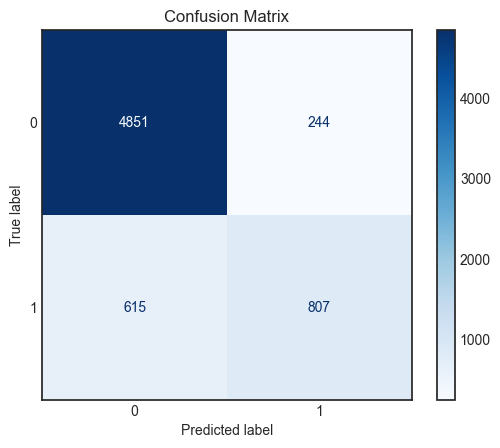

In [55]:
ConfusionMatrixDisplay.from_estimator(clf_pipeline, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

### Random Forest

In [69]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt', 'log2']
}
grid_search_rf = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc', 
    verbose=2,
    n_jobs=-1
)

# Fit the grid search
grid_search_rf.fit(X_train, y_train)



Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'log_income',
                                                                          'emp_length',
                                                                          'loan_amount',
                                                                          'interest_rate',
                                                                          'credit_history_length',
                                                                          'loan_to_income_ratio',
                                                                          'debt_to_income_ratio',
                                                                          'open_accounts',
                                                                          'credit_uti...
                                                                          'country',
                                                                          'employment_type',
                                                                          'loan_term_months'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='roc_auc', verbose=2)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5095
           1       0.97      0.71      0.82      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



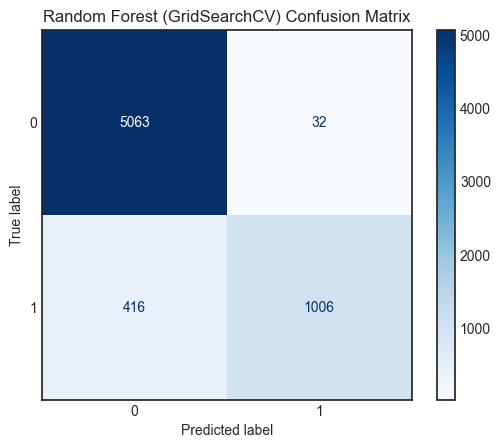

In [70]:
best_rf_model = grid_search_rf.best_estimator_

# Predict
y_pred_rf = best_rf_model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test, cmap='Blues')
plt.title("Random Forest (GridSearchCV) Confusion Matrix")
plt.grid(False)
plt.show()

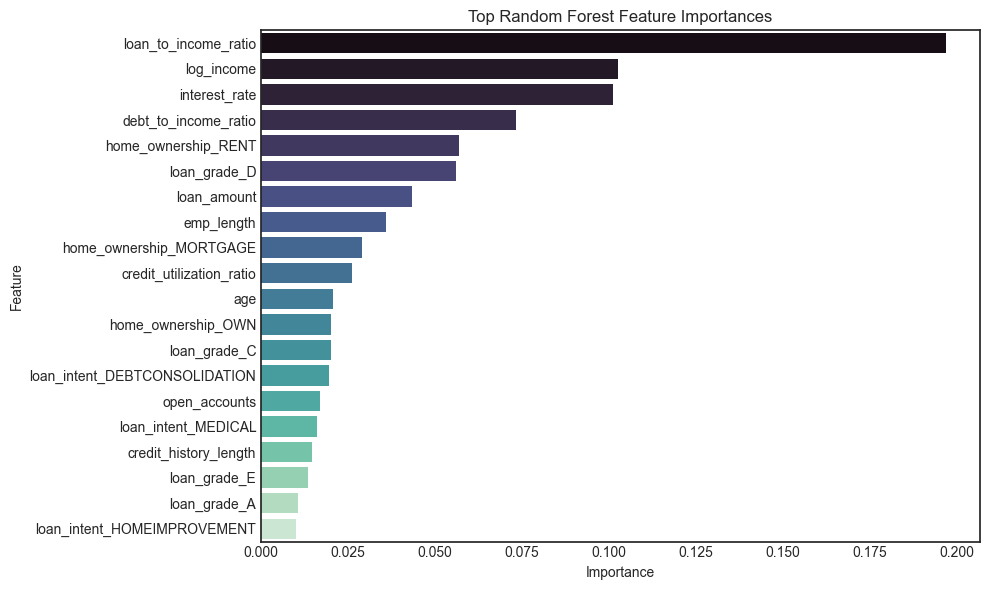

In [72]:
rf_model = best_rf_model.named_steps['classifier']


onehot = best_rf_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
encoded_cat_feature_names = onehot.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, encoded_cat_feature_names])

# importances
importances = rf_model.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(top_n), palette='mako')
plt.title('Top Random Forest Feature Importances')
plt.tight_layout()
plt.show()


### XGBoost

In [63]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])



In [64]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

In [65]:
grid_search = GridSearchCV(
    xgb_pipeline,
    param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='f1',            # or 'roc_auc', 'accuracy', etc.
    verbose=2,
    n_jobs=-1                # Use all cores
)

# Fit to training data
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}
Best F1 Score: 0.830882294066259



Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5095
           1       0.95      0.73      0.83      1422

    accuracy                           0.93      6517
   macro avg       0.94      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517



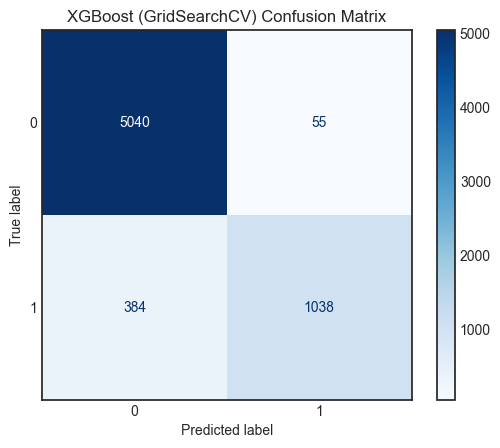

In [66]:
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluation
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title("XGBoost (GridSearchCV) Confusion Matrix")
plt.grid(False)
plt.show()

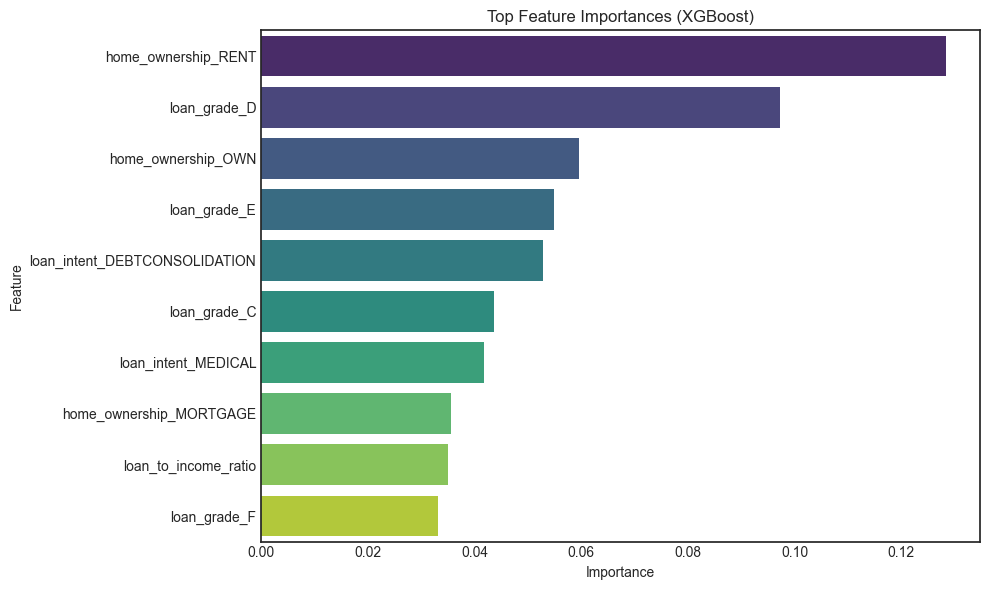

In [67]:
xgb_model = grid_search.best_estimator_.named_steps['classifier']


numeric_feature_names = numeric_features

onehot = grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
encoded_cat_feature_names = onehot.get_feature_names_out(categorical_features)


all_feature_names = np.concatenate([numeric_feature_names, encoded_cat_feature_names])

# Step 3: Get feature importances and map to feature names
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})


top_n = 10
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()
